# Regularization vs Normalization

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print("petal length(꽃잎 길이)", X)
print("sepal length(꽃받침의 길이)", Y)

petal length(꽃잎 길이) [6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
sepal length(꽃받침의 길이) [6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


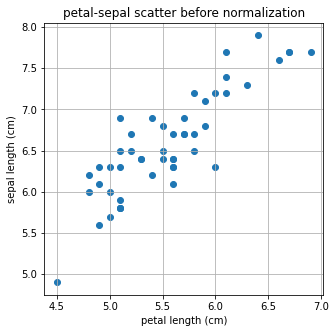

In [3]:
# 정규화전
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

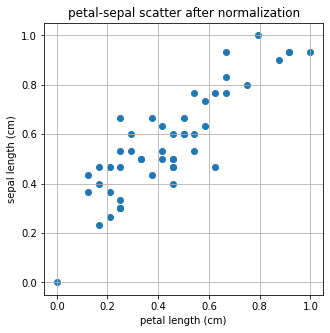

In [5]:
# 정규화후
from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

## LinearRegression으로

In [6]:
# regularization
from sklearn.linear_model import LinearRegression
import numpy as np 

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


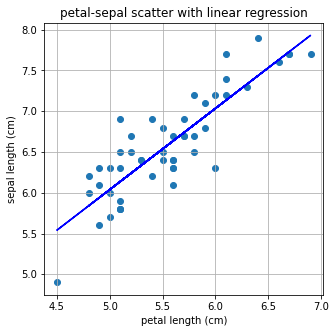

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

## L1규제가 있는 Lasso

기울기 : 0.00, 절편 : 6.59


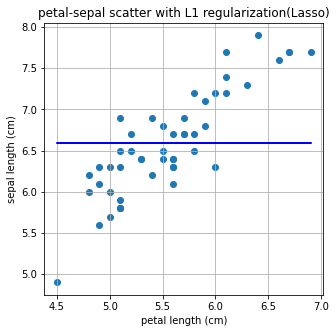

In [9]:
# L1 regularization은 Lasso로 import 합니다.
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1),Y)
a, b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X, L1.predict(X.reshape(-1,1)),'-b' )
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

## L2규제가있는 Ridge

기울기 : 0.93, 절편 : 1.41


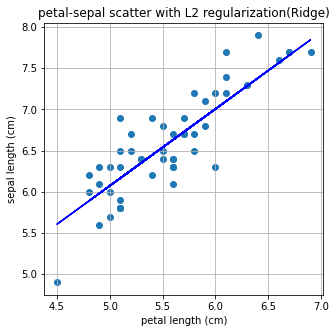

In [10]:
# Q. linear regression의 코드를 참고하여, 아래 코드를 채워주세요!

# L2 regularization은 Ridge로 import 합니다.
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1,1),Y)
a, b = L2.coef_,L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X, L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

# 드롭아웃

In [2]:
# not overfitting

# data 준비
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
# dropout 0.9로 추가
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.9), # dropout layer
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4062 - accuracy: 0.4481
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1595 - accuracy: 0.5345
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0981 - accuracy: 0.5609
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0613 - accuracy: 0.5727
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0479 - accuracy: 0.5819


In [5]:
# dropout 없이
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # 이번에는 dropout layer가 없습니다. 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4945 - accuracy: 0.8262
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3745 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3330 - accuracy: 0.8779
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3103 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2933 - accuracy: 0.8918


In [8]:
# epcho을 50번으로 오버피팅해보자
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

# Dense layer만으로 만들어 낸 classification 모델입니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/50
117/117 [==============================] - 2s 13ms/step - loss: 2.0422 - accuracy: 0.5466 - val_loss: 1.6310 - val_accuracy: 0.6033
Epoch 2/50
117/117 [==============================] - 1s 12ms/step - loss: 1.3888 - accuracy: 0.6188 - val_loss: 1.1620 - val_accuracy: 0.6700
Epoch 3/50
117/117 [==============================] - 1s 13ms/step - loss: 1.0599 - accuracy: 0.6853 - val_loss: 0.9364 - val_accuracy: 0.7333
Epoch 4/50
117/117 [==============================] - 1s 12ms/step - loss: 0.8836 - accuracy: 0.7165 - val_loss: 0.8100 - val_accuracy: 0.7550
Epoch 5/50
117/117 [==============================] - 1s 13ms/step - loss: 0.7813 - accuracy: 0.7359 - val_loss: 0.7259 - val_accuracy: 0.7700
Epoch 6/50
117/117 [==============================] - 1s 13ms/step - loss: 0.7187 - accuracy: 0.7475 - val_loss: 0.6797 - val_accuracy: 0.7800
Epoch 7/50
117/117 [==============================] - 1s 13ms/step - loss: 0.6770 - accuracy: 0.7588 - val_loss: 0.6499 - val_accuracy: 0.7883

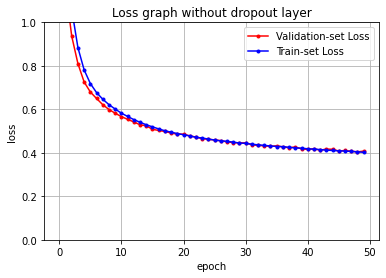

In [9]:
# loss값을 시각화
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

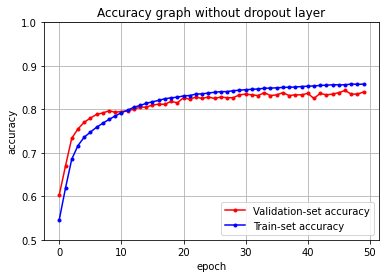

In [10]:
# accuracy 값을 시각화
# dropout layer가 없는 것의 accuracy를 보니 점점 증가한다.
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

dropout layer가 없는 것의 train set의 accuracy는 점점 증가하고 loss는 점점 감소한다.

In [11]:
# dropout 있이 50번 학습해보기

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),# [[YOUR CODE]]
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/50
117/117 [==============================] - 2s 15ms/step - loss: 2.0651 - accuracy: 0.4825 - val_loss: 1.6809 - val_accuracy: 0.5783
Epoch 2/50
117/117 [==============================] - 2s 15ms/step - loss: 1.4729 - accuracy: 0.5509 - val_loss: 1.2398 - val_accuracy: 0.6383
Epoch 3/50
117/117 [==============================] - 2s 14ms/step - loss: 1.1744 - accuracy: 0.6183 - val_loss: 1.0219 - val_accuracy: 0.7017
Epoch 4/50
117/117 [==============================] - 2s 15ms/step - loss: 1.0018 - accuracy: 0.6667 - val_loss: 0.8824 - val_accuracy: 0.7383
Epoch 5/50
117/117 [==============================] - 2s 14ms/step - loss: 0.8916 - accuracy: 0.6970 - val_loss: 0.7925 - val_accuracy: 0.7633
Epoch 6/50
117/117 [==============================] - 2s 14ms/step - loss: 0.8199 - accuracy: 0.7138 - val_loss: 0.7347 - val_accuracy: 0.7733
Epoch 7/50
117/117 [==============================] - 2s 14ms/step - loss: 0.7708 - accuracy: 0.7261 - val_loss: 0.6982 - val_accuracy: 0.7783

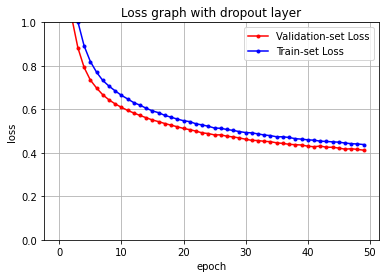

In [12]:
# dropout이 있는 loss 값 시각화.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

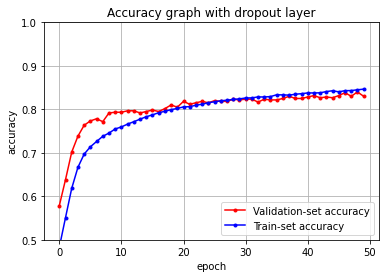

In [13]:
# dropout이 있는 accuracy 값 시각화
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

dropout을 추가한것의 시각화를 보면 두 val_accuracy(검증용)와 train_accuracy(훈련용)이 비슷한걸 볼 수 있음

# Batch Normalization
딥러닝에서 경사하강법으로 가중치를 업데이트할 때 방법
- Batch Gradient Descent: 데이터셋 전체를 본 다음 업데이트
- Stochastic Gradient Descent: 데이터 하나를 관찰할 때마다 업데이트
- Mini-batch Gradient Descent: 위두개의 절충안. mini batch로 쪼갠 후 하나의 batch를 처리할때마다 가중치를 업데이트 하는것
맨위 2개의 절충안으로써 mini-batch는 학습 속도와 안정성을 둘다 만족했지만, 딥러닝 모델 내부에서 데이터가 처리되면서 mini batch로 쪼갤때 batch마다 데이터 분포의 차이가 생길 수 있다는 문제가 있었다.

In [3]:
# 아무것도하지 않은 완전연결(fully connected layer)
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 49ms/step - loss: 1.2607 - accuracy: 0.6116 - val_loss: 0.7638 - val_accuracy: 0.7366
Epoch 2/20
21/21 [==============================] - 1s 35ms/step - loss: 0.6651 - accuracy: 0.7777 - val_loss: 0.6057 - val_accuracy: 0.7951
Epoch 3/20
21/21 [==============================] - 1s 34ms/step - loss: 0.5595 - accuracy: 0.8129 - val_loss: 0.5399 - val_accuracy: 0.8191
Epoch 4/20
21/21 [==============================] - 1s 35ms/step - loss: 0.5101 - accuracy: 0.8293 - val_loss: 0.5076 - val_accuracy: 0.8277
Epoch 5/20
21/21 [==============================] - 1s 32ms/step - loss: 0.4802 - accuracy: 0.8371 - val_loss: 0.4792 - val_accuracy: 0.8390
Epoch 6/20
21/21 [==============================] - 1s 35ms/step - loss: 0.4564 - accuracy: 0.8462 - val_loss: 0.4680 - val_accuracy: 0.8412
Epoch 7/20
21/21 [==============================] - 1s 36ms/step - loss: 0.4384 - accuracy: 0.8515 - val_loss: 0.4471 - val_accuracy: 0.8458
Epoch 8/20
21

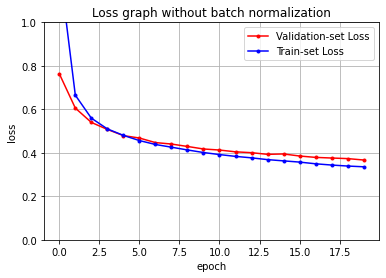

In [6]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

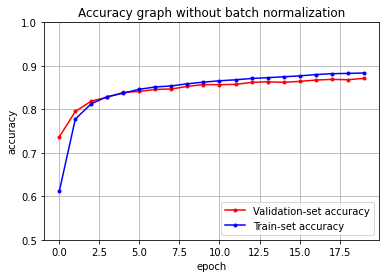

In [7]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [8]:
# 이번엔 Batch Normalization layer으로

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(28, 28)),

    keras.layers.BatchNormalization(), # BatchNormalization 추가

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 2s 66ms/step - loss: 0.9602 - accuracy: 0.6759 - val_loss: 1.1157 - val_accuracy: 0.6703
Epoch 2/20
21/21 [==============================] - 1s 59ms/step - loss: 0.4980 - accuracy: 0.8265 - val_loss: 0.9690 - val_accuracy: 0.7521
Epoch 3/20
21/21 [==============================] - 1s 57ms/step - loss: 0.4279 - accuracy: 0.8497 - val_loss: 0.8651 - val_accuracy: 0.7967
Epoch 4/20
21/21 [==============================] - 1s 57ms/step - loss: 0.3939 - accuracy: 0.8616 - val_loss: 0.7547 - val_accuracy: 0.8274
Epoch 5/20
21/21 [==============================] - 1s 57ms/step - loss: 0.3711 - accuracy: 0.8690 - val_loss: 0.6608 - val_accuracy: 0.8396
Epoch 6/20
21/21 [==============================] - 1s 57ms/step - loss: 0.3503 - accuracy: 0.8768 - val_loss: 0.5787 - val_accuracy: 0.8489
Epoch 7/20
21/21 [==============================] - 1s 58ms/step - loss: 0.3348 - accuracy: 0.8812 - val_loss: 0.5148 - val_accuracy: 0.8591
Epoch 8/20
21

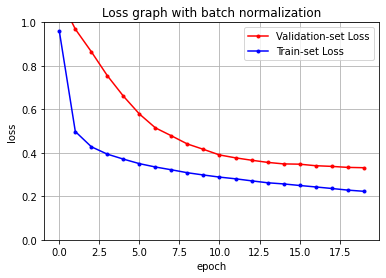

In [9]:
# batch normalization을 한 loss 값
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

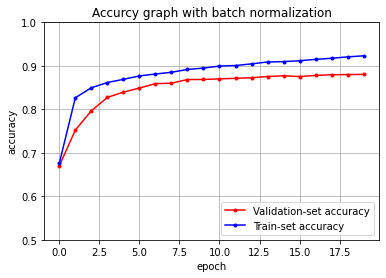

In [10]:
# batch normalization을 한 accuracy
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accurcy graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

batch normalization을 추가한것이 좀 더 높은 정확도를 볼 수 있음